# KHUDA 3조 ToyProject

## 주제: 기대 수명 분석 및 예측

## 1. 라이브러리 불러오기

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
from google.colab import files

## 2. EDA

In [2]:
upload = files.upload()

Saving Life Expectancy Data.csv to Life Expectancy Data (1).csv


In [69]:
import io
df = pd.read_csv(io.BytesIO(upload['Life Expectancy Data (1).csv']))

In [70]:
df.head()

,Country,Region,Year,Economy_status_Developed,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol_consumption,percentage expenditure,Hepatitis_B,...,Polio,Total expenditure,Income composition of resources,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling
0,Afghanistan,Asia,2000,0,55.8,310.8305,90.5,0.02,10.424960,62,...,24.0,8.20,0.338,24,0.02,148,20.78,2.3,2.5,2.2
1,Afghanistan,Asia,2001,0,56.3,304.8580,87.9,0.02,10.574728,63,...,35.0,7.80,0.340,33,0.02,163,21.61,2.1,2.4,2.2
2,Afghanistan,Asia,2002,0,56.8,298.8855,85.3,0.02,16.887351,64,...,36.0,7.76,0.341,36,0.02,320,22.60,19.9,2.2,2.3
3,Afghanistan,Asia,2003,0,57.3,292.0365,82.7,0.02,11.089053,65,...,41.0,8.82,0.373,41,0.02,332,23.68,19.7,19.9,2.4
4,Afghanistan,Asia,2004,0,57.8,285.1880,80.0,0.02,15.296066,67,...,5.0,8.79,0.381,50,0.02,323,24.73,19.5,19.7,2.5


In [71]:
df.describe()

,Year,Economy_status_Developed,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol_consumption,percentage expenditure,Hepatitis_B,Measles,BMI,...,Polio,Total expenditure,Income composition of resources,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling
count,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,...,2842.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000
mean,2007.500000,0.207865,68.951053,190.900665,30.083638,4.836912,785.159798,64.646419,2129.247191,37.760779,...,80.935961,5.398230,0.595355,86.343750,0.888279,11596.329003,36.772015,4.855337,4.889747,7.652598
std,4.610582,0.405851,9.344445,113.793213,27.350692,3.985663,2078.005561,39.384860,10410.838983,20.613049,...,25.907617,2.948892,0.252908,15.536902,2.385462,16966.115062,136.862723,4.448052,4.535495,3.168410
min,2000.000000,0.000000,39.400000,49.384000,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000
25%,2003.750000,0.000000,62.900000,106.681875,8.100000,1.220000,6.914542,9.000000,0.000000,18.800000,...,76.000000,3.640000,0.466000,81.000000,0.080000,1404.250000,2.070000,1.600000,1.600000,5.100000
50%,2007.500000,0.000000,71.450000,163.277750,19.400000,4.050000,71.850511,86.000000,15.000000,43.100000,...,93.000000,5.480000,0.665500,93.000000,0.150000,4256.500000,7.730000,3.300000,3.300000,7.900000
75%,2011.250000,0.000000,75.500000,245.323375,47.000000,7.810000,470.528518,96.000000,309.000000,56.300000,...,97.000000,7.320000,0.779000,97.000000,0.440000,12706.750000,23.850000,7.200000,7.300000,10.300000
max,2015.000000,1.000000,83.800000,719.360500,138.100000,17.870000,19479.911610,99.000000,212183.000000,79.300000,...,99.000000,17.600000,0.948000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2848 non-null   object 
 1   Region                           2848 non-null   object 
 2   Year                             2848 non-null   int64  
 3   Economy_status_Developed         2848 non-null   int64  
 4   Life_expectancy                  2848 non-null   float64
 5   Adult_mortality                  2848 non-null   float64
 6   Infant_deaths                    2848 non-null   float64
 7   Alcohol_consumption              2848 non-null   float64
 8   percentage expenditure           2848 non-null   float64
 9   Hepatitis_B                      2848 non-null   int64  
 10  Measles                          2848 non-null   int64  
 11  BMI                              2848 non-null   float64
 12  Under_five_deaths   

In [73]:
df.isna().sum()

Country                            0
Region                             0
Year                               0
Economy_status_Developed           0
Life_expectancy                    0
Adult_mortality                    0
Infant_deaths                      0
Alcohol_consumption                0
percentage expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
Under_five_deaths                  0
Polio                              6
Total expenditure                  0
Income composition of resources    0
Diphtheria                         0
Incidents_HIV                      0
GDP_per_capita                     0
Population_mln                     0
Thinness_ten_nineteen_years        0
Thinness_five_nine_years           0
Schooling                          0
dtype: int64

In [74]:
df[df.isna().any(axis=1)]

,Country,Region,Year,Economy_status_Developed,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol_consumption,percentage expenditure,Hepatitis_B,...,Polio,Total expenditure,Income composition of resources,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling
1728,Montenegro,Rest of Europe,2000,0,73.2,138.1465,12.5,10.25,274.547260,0,...,NaN,7.32,0.000,91,0.01,4432,0.60,2.6,2.7,10.3
1729,Montenegro,Rest of Europe,2001,0,73.2,138.1465,12.0,10.22,33.669814,0,...,NaN,8.23,0.000,91,0.02,4462,0.61,2.5,2.6,10.3
1730,Montenegro,Rest of Europe,2002,0,73.2,138.1465,11.4,10.24,36.480240,0,...,NaN,8.33,0.000,91,0.02,4529,0.61,2.5,2.5,10.3
1731,Montenegro,Rest of Europe,2003,0,73.3,135.7445,10.6,10.30,495.078296,0,...,NaN,8.91,0.000,91,0.02,4623,0.61,2.4,2.4,10.3
1732,Montenegro,Rest of Europe,2004,0,73.4,133.3415,9.9,10.12,57.121901,0,...,NaN,8.45,0.740,91,0.02,4819,0.61,2.3,2.4,10.4
1733,Montenegro,Rest of Europe,2005,0,74.0,130.9385,9.2,10.30,527.307672,0,...,NaN,8.46,0.746,92,0.03,5013,0.61,2.3,2.3,10.5


In [75]:
df = df.drop(df.index[1728:1734])

데이터를 불러왔을 때 연관성이 있는 카테고리로 분류를 해서 따로 데이터프레임을 생성하였다. 각각의 데이터프레임끼리의 연관성을 확인하면서 EDA와 전처리를 진행할 예정이다.

## Life Expectancy

<Axes: xlabel='Life_expectancy', ylabel='Count'>

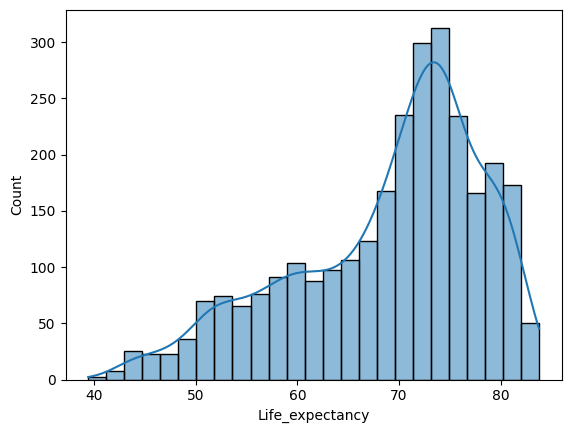

In [77]:
sns.histplot(data=df['Life_expectancy'], kde=True)

## Lifestyle

In [78]:
# Smoking, Sleep_time 데이터 구축 필요
columns = ['Life_expectancy', 'Alcohol_consumption', 'BMI']
lifestyle_df = pd.DataFrame(df, columns=columns)
lifestyle_df.head()

,Life_expectancy,Alcohol_consumption,BMI
0,55.8,0.02,12.2
1,56.3,0.02,12.6
2,56.8,0.02,13.0
3,57.3,0.02,13.4
4,57.8,0.02,13.8


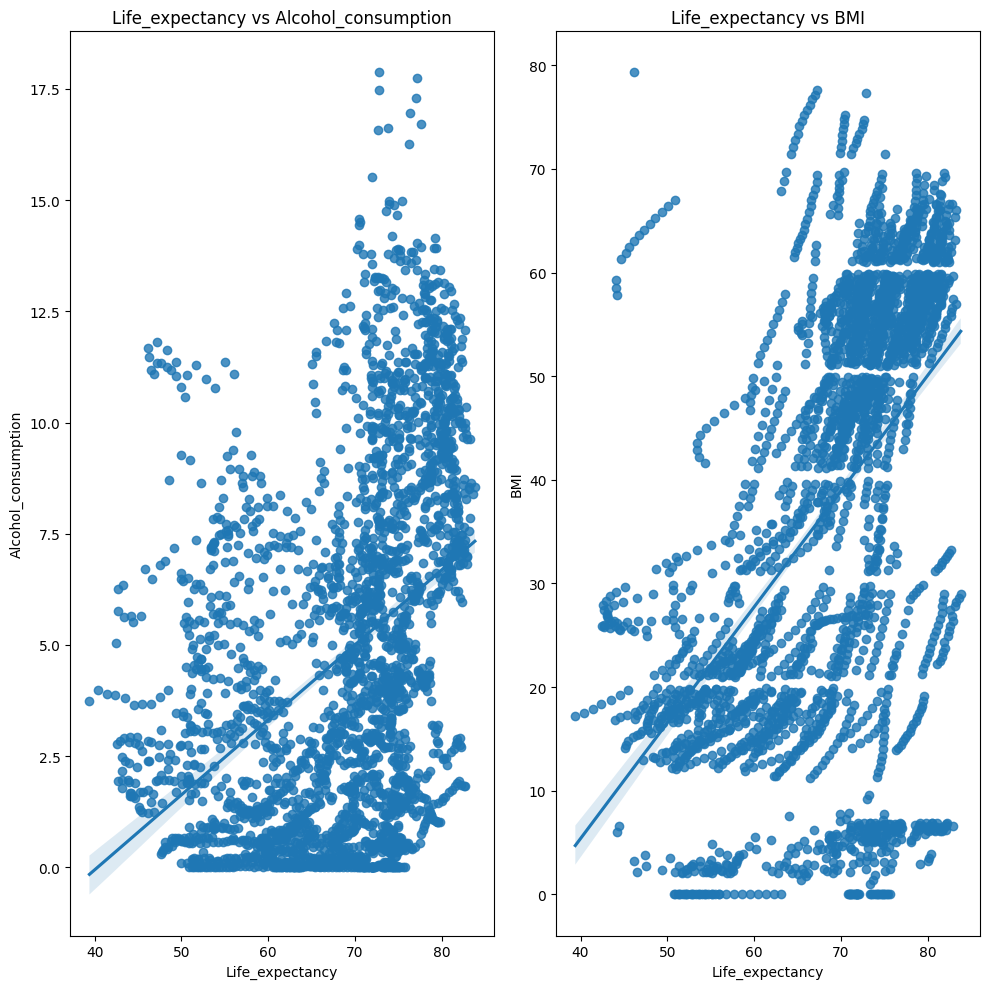

In [81]:
figure, axis = plt.subplots(1,2,figsize=(10,10))

sns.regplot(x='Life_expectancy', y='Alcohol_consumption', data=lifestyle_df, ax=axis[0])
axis[0].set_title('Life_expectancy vs Alcohol_consumption')

sns.regplot(x='Life_expectancy', y='BMI', data=lifestyle_df, ax=axis[1])
axis[1].set_title('Life_expectancy vs BMI')

plt.tight_layout()
plt.show()

<Axes: >

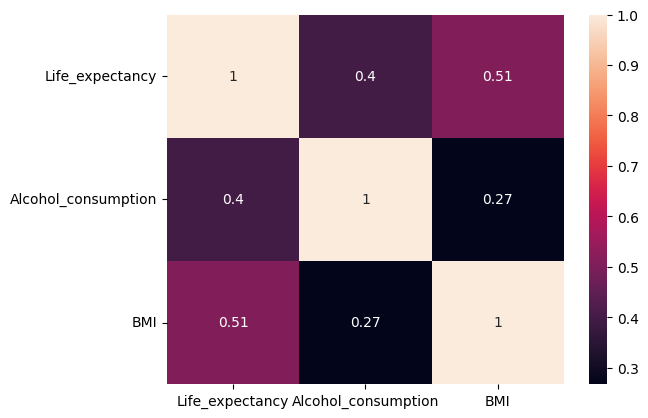

In [82]:
sns.heatmap(lifestyle_df.corr(), annot=True)

## Health

In [83]:
# 없애기
columns = ['Life_expectancy', 'Alcohol_consumption', 'BMI', 'Thinness_five_nine_years', 'Thinness_ten_nineteen_years', 'Diphtheria', 'Hepatitis_B', 'Polio', 'Income composition of resources', 'Incidents_HIV', 'Measles']
health_df = pd.DataFrame(df, columns=columns)
health_df.head()

,Life_expectancy,Alcohol_consumption,BMI,Thinness_five_nine_years,Thinness_ten_nineteen_years,Diphtheria,Hepatitis_B,Polio,Income composition of resources,Incidents_HIV,Measles
0,55.8,0.02,12.2,2.5,2.3,24,62,24.0,0.338,0.02,6532
1,56.3,0.02,12.6,2.4,2.1,33,63,35.0,0.340,0.02,8762
2,56.8,0.02,13.0,2.2,19.9,36,64,36.0,0.341,0.02,2486
3,57.3,0.02,13.4,19.9,19.7,41,65,41.0,0.373,0.02,798
4,57.8,0.02,13.8,19.7,19.5,50,67,5.0,0.381,0.02,466


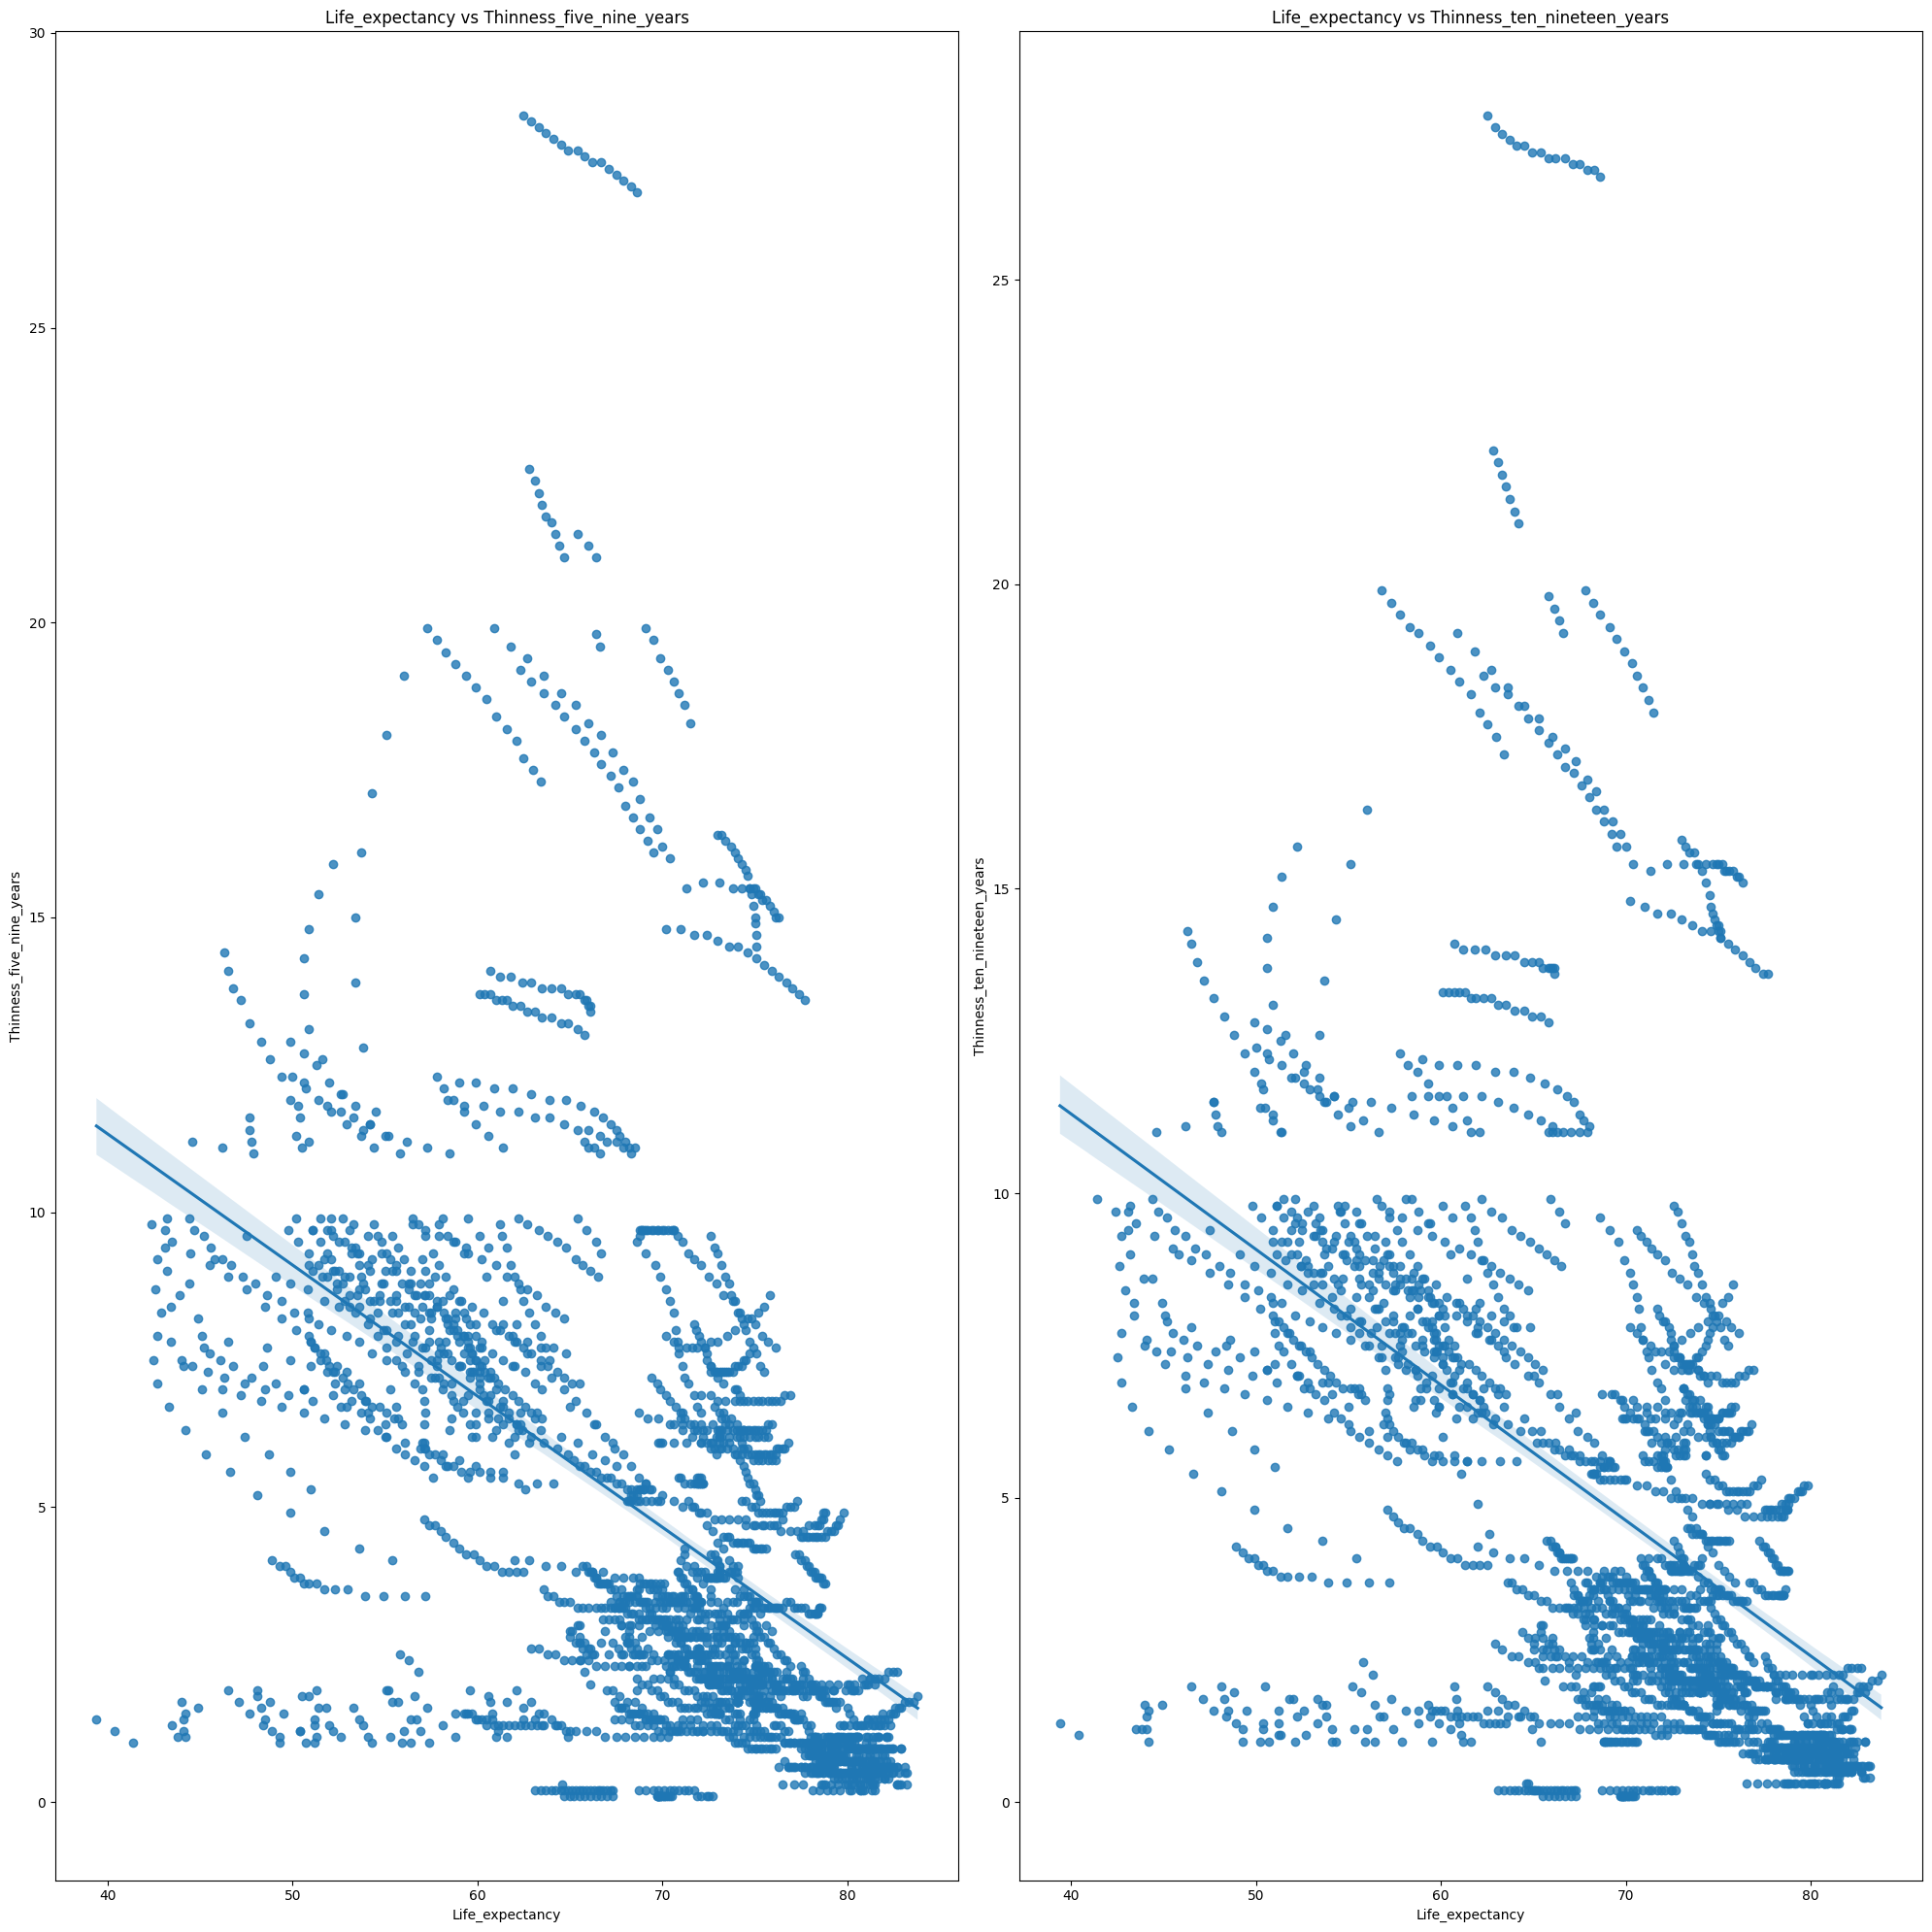

In [84]:
figure, axis = plt.subplots(1, 2,figsize=(20,20))

sns.regplot(x='Life_expectancy', y='Thinness_five_nine_years', data=health_df, ax=axis[0])
axis[0].set_title('Life_expectancy vs Thinness_five_nine_years')

sns.regplot(x='Life_expectancy', y='Thinness_ten_nineteen_years', data=health_df, ax=axis[1])
axis[1].set_title('Life_expectancy vs Thinness_ten_nineteen_years')


plt.tight_layout()
plt.show()

In [85]:
columns = ['Life_expectancy', 'Female Life Expectancy', 'Male Life Expectancy', 'Thinness_five_nine_years', 'Thinness_ten_nineteen_years']
healthcare_df = pd.DataFrame(df, columns=columns)

<Axes: >

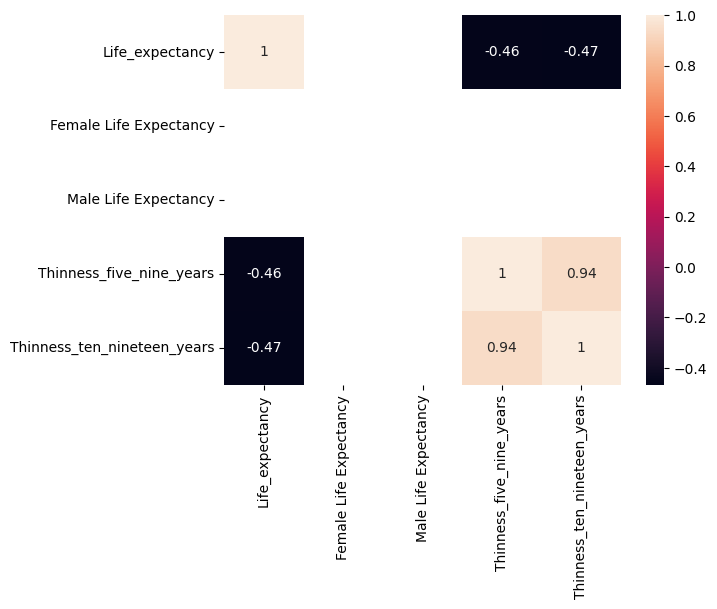

In [86]:
sns.heatmap(healthcare_df.corr(), annot=True)

기대수명과 알코올, BMI, BMI지수가 낮은 마른체형유병률과의 상관계수가 0.4~0.5 사이로, 유의미한 결과가 나오지 않았다.

## Disease

In [87]:
columns = ['Life_expectancy', 'Diphtheria', 'Hepatitis_B', 'Polio', 'Incidents_HIV', 'Measles']
disease_df = pd.DataFrame(df, columns=columns)
disease_df.head()

,Life_expectancy,Diphtheria,Hepatitis_B,Polio,Incidents_HIV,Measles
0,55.8,24,62,24.0,0.02,6532
1,56.3,33,63,35.0,0.02,8762
2,56.8,36,64,36.0,0.02,2486
3,57.3,41,65,41.0,0.02,798
4,57.8,50,67,5.0,0.02,466


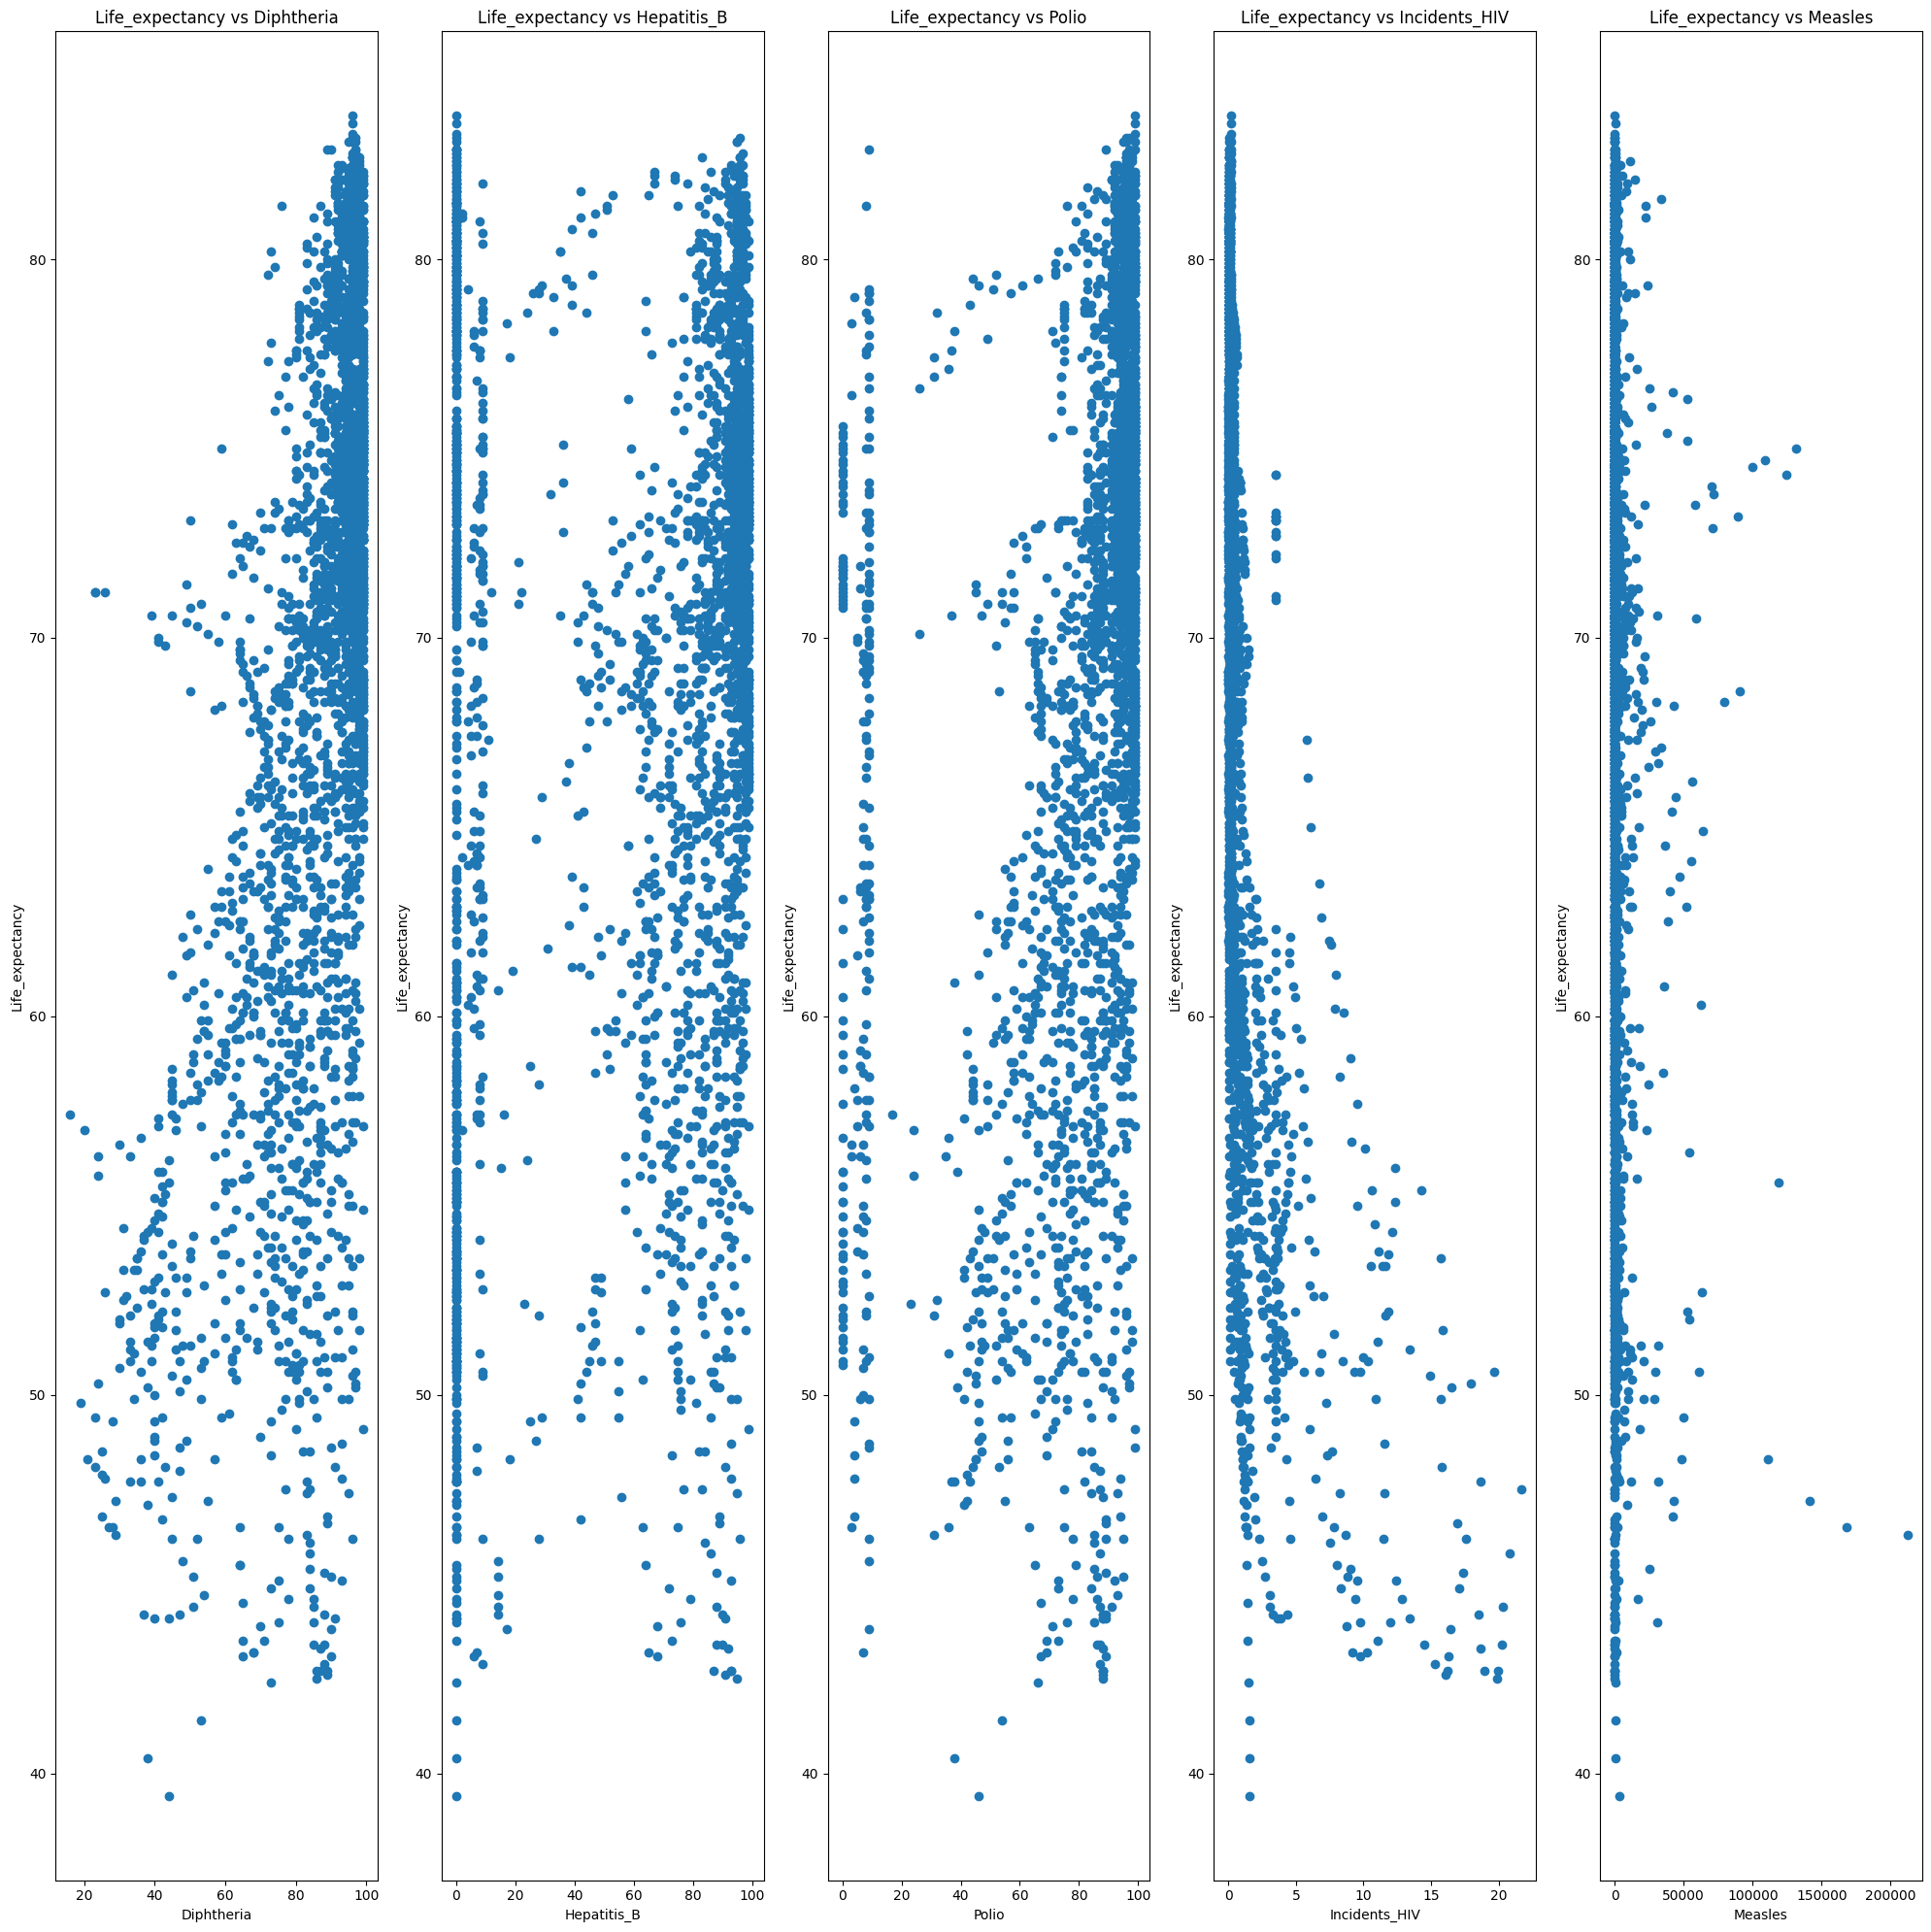

In [89]:
figure, axis = plt.subplots(1,5,figsize=(20,20))

axis[0].scatter(disease_df['Diphtheria'], disease_df['Life_expectancy'])
axis[0].set_ylabel('Life_expectancy')
axis[0].set_xlabel('Diphtheria')
axis[0].set_title('Life_expectancy vs Diphtheria')

axis[1].scatter(disease_df['Hepatitis_B'], disease_df['Life_expectancy'])
axis[1].set_ylabel('Life_expectancy')
axis[1].set_xlabel('Hepatitis_B')
axis[1].set_title('Life_expectancy vs Hepatitis_B')

axis[2].scatter(disease_df['Polio'], disease_df['Life_expectancy'])
axis[2].set_ylabel('Life_expectancy')
axis[2].set_xlabel('Polio')
axis[2].set_title('Life_expectancy vs Polio')

axis[3].scatter(disease_df['Incidents_HIV'], disease_df['Life_expectancy'])
axis[3].set_ylabel('Life_expectancy')
axis[3].set_xlabel('Incidents_HIV')
axis[3].set_title('Life_expectancy vs Incidents_HIV')

axis[4].scatter(disease_df['Measles'], disease_df['Life_expectancy'])
axis[4].set_ylabel('Life_expectancy')
axis[4].set_xlabel('Measles')
axis[4].set_title('Life_expectancy vs Measles')

plt.tight_layout()
plt.show()

<Axes: >

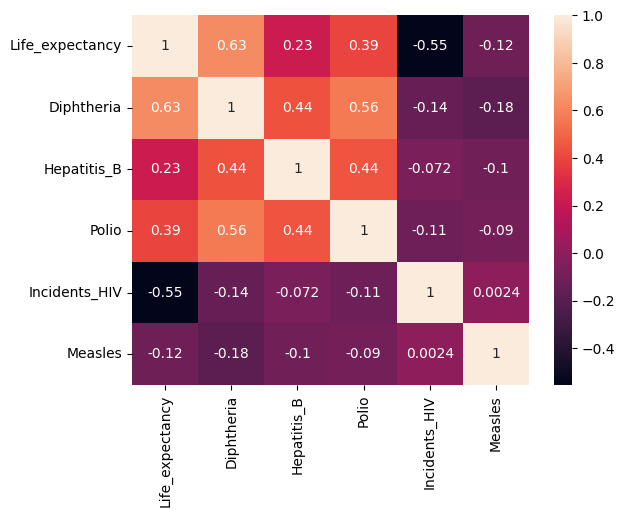

In [90]:
sns.heatmap(disease_df.corr(), annot=True)

## Region

In [91]:
columns = ['Life_expectancy', 'Population_mln', 'Economy_status_Developed', 'GDP_per_capita', 'Total expenditure', 'percentage expenditure','Income composition of resources', 'Schooling']
region_df = pd.DataFrame(df, columns=columns)
region_df.head()

,Life_expectancy,Population_mln,Economy_status_Developed,GDP_per_capita,Total expenditure,percentage expenditure,Income composition of resources,Schooling
0,55.8,20.78,0,148,8.20,10.424960,0.338,2.2
1,56.3,21.61,0,163,7.80,10.574728,0.340,2.2
2,56.8,22.60,0,320,7.76,16.887351,0.341,2.3
3,57.3,23.68,0,332,8.82,11.089053,0.373,2.4
4,57.8,24.73,0,323,8.79,15.296066,0.381,2.5


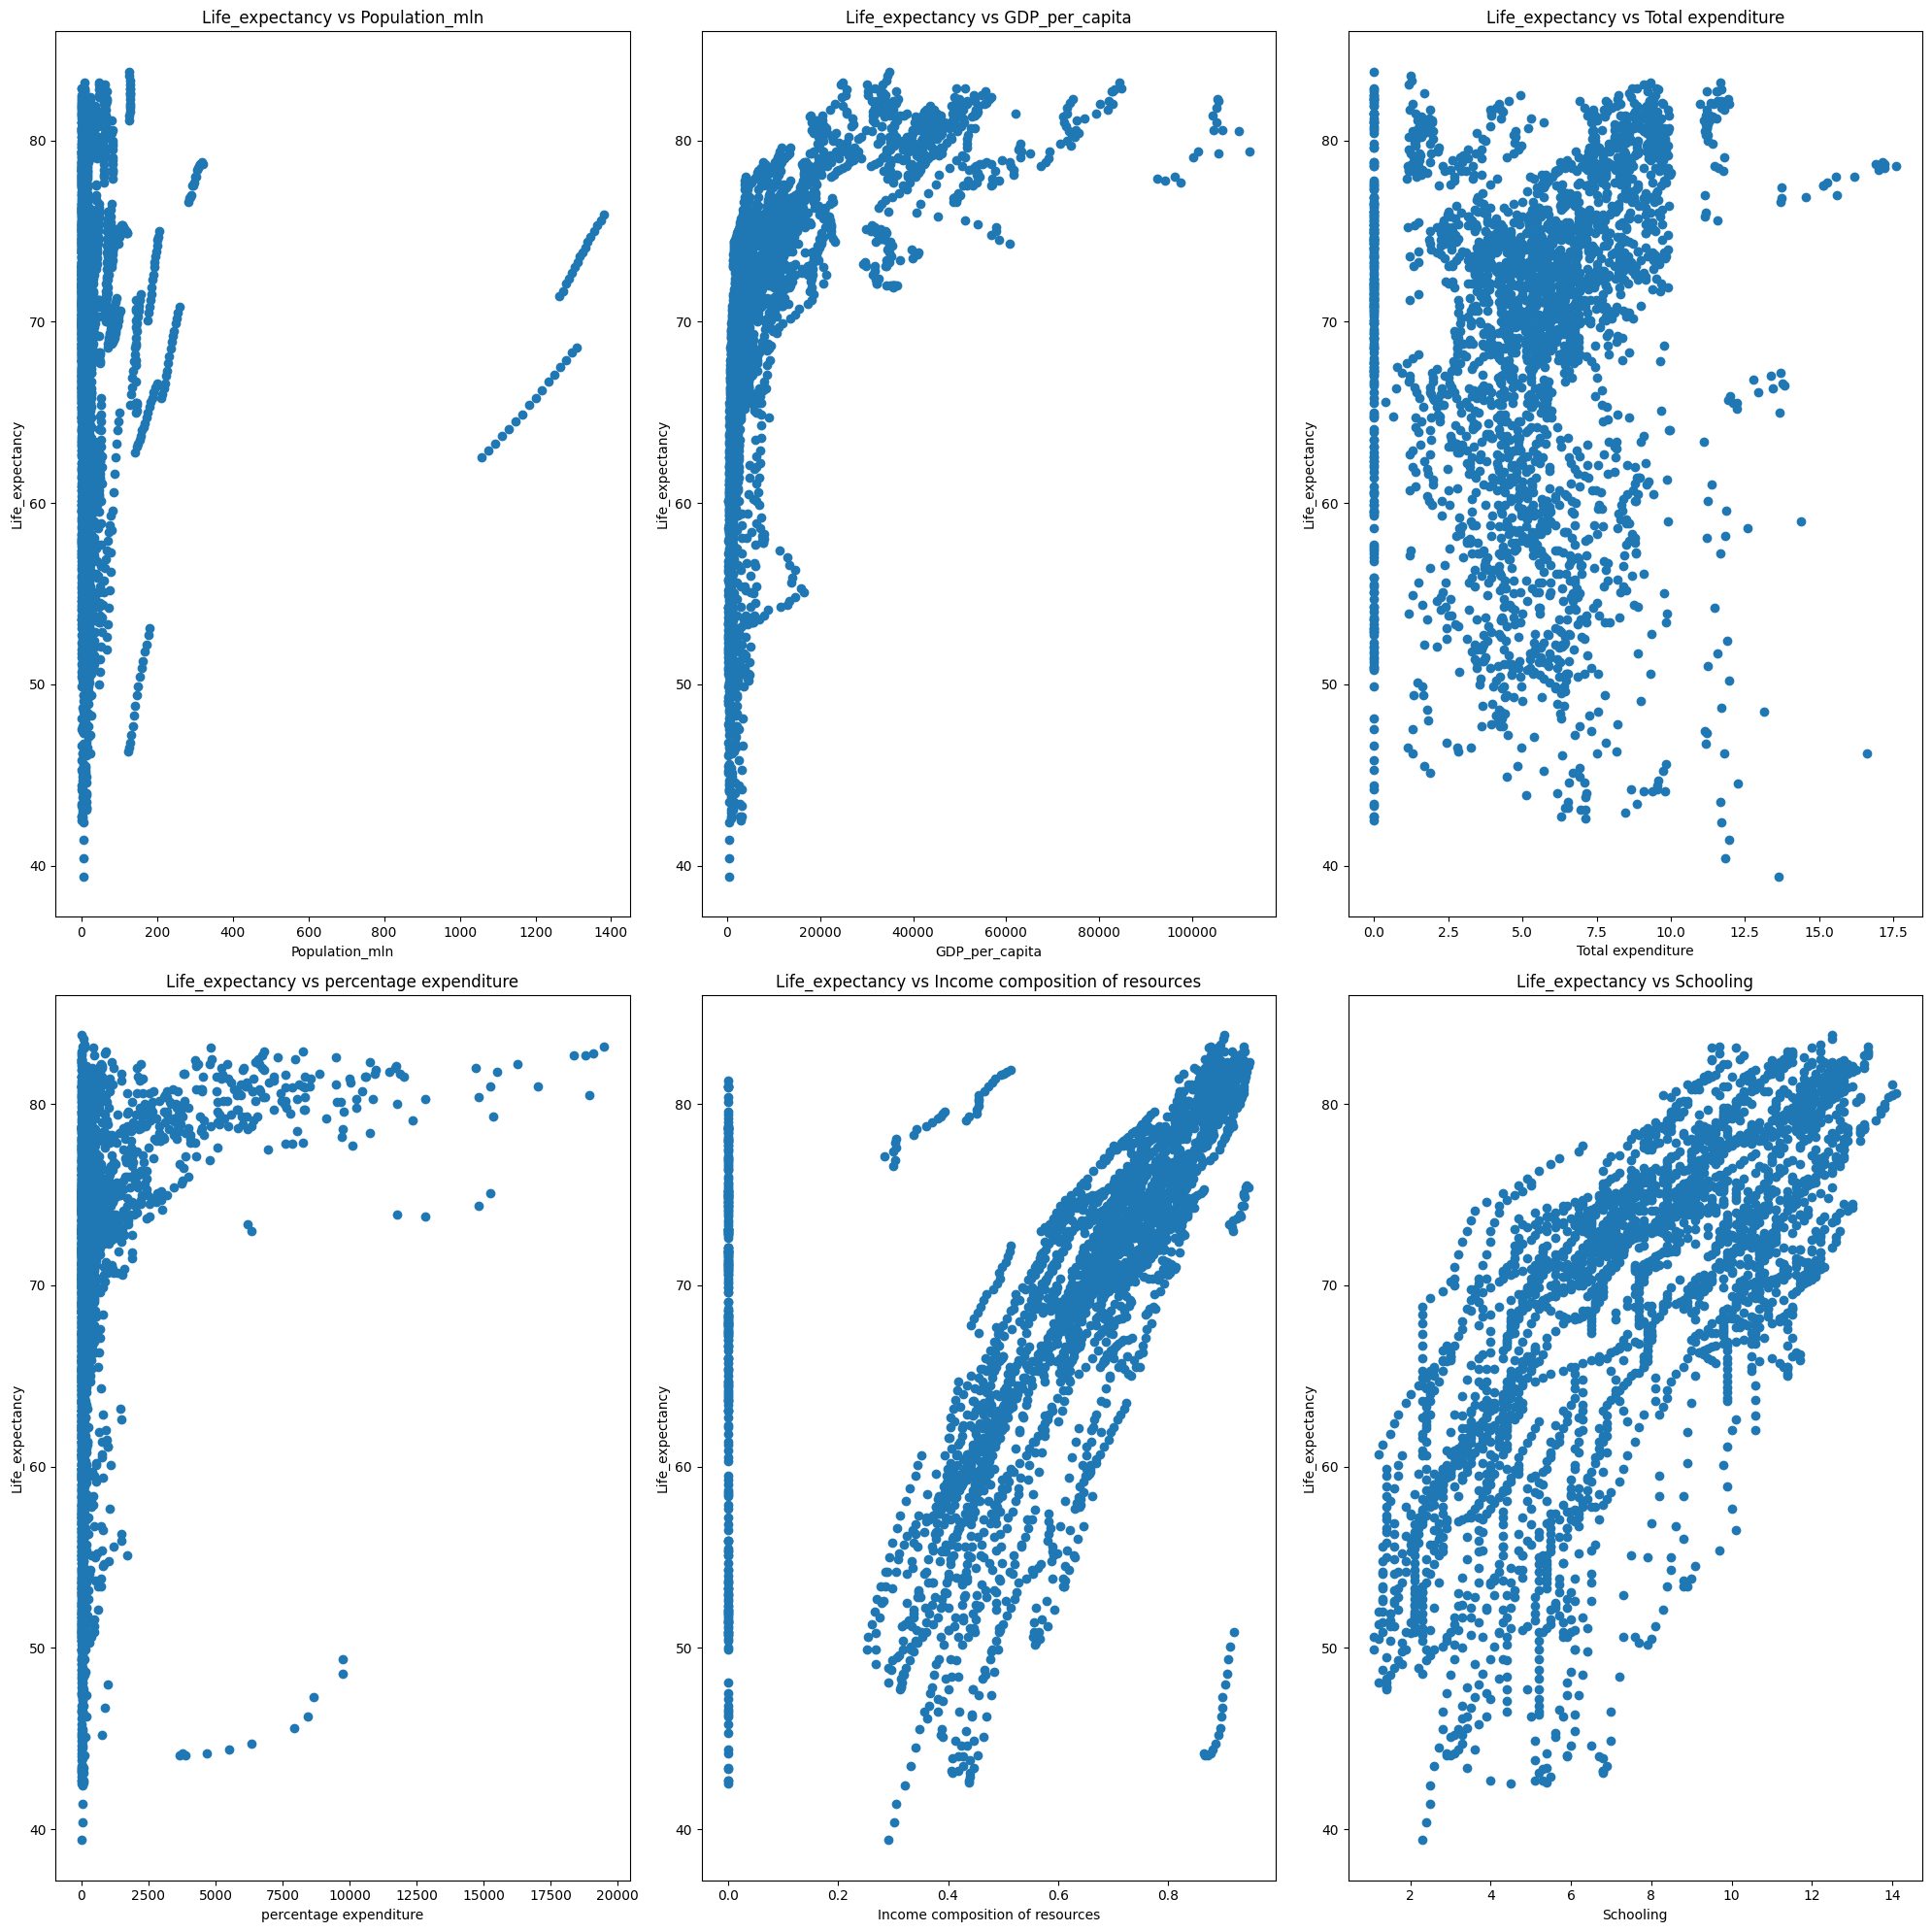

In [92]:
figure, axis = plt.subplots(2,3,figsize=(20,20))

axis[0,0].scatter(df['Population_mln'], df['Life_expectancy'])
axis[0,0].set_ylabel('Life_expectancy')
axis[0,0].set_xlabel('Population_mln')
axis[0,0].set_title('Life_expectancy vs Population_mln')

axis[0,1].scatter(df['GDP_per_capita'], df['Life_expectancy'])
axis[0,1].set_ylabel('Life_expectancy')
axis[0,1].set_xlabel('GDP_per_capita')
axis[0,1].set_title('Life_expectancy vs GDP_per_capita')

axis[0,2].scatter(df['Total expenditure'], df['Life_expectancy'])
axis[0,2].set_ylabel('Life_expectancy')
axis[0,2].set_xlabel('Total expenditure')
axis[0,2].set_title('Life_expectancy vs Total expenditure')

axis[1,0].scatter(df['percentage expenditure'], df['Life_expectancy'])
axis[1,0].set_ylabel('Life_expectancy')
axis[1,0].set_xlabel('percentage expenditure')
axis[1,0].set_title('Life_expectancy vs percentage expenditure')

axis[1,1].scatter(df['Income composition of resources'], df['Life_expectancy'])
axis[1,1].set_ylabel('Life_expectancy')
axis[1,1].set_xlabel('Income composition of resources')
axis[1,1].set_title('Life_expectancy vs Income composition of resources')

axis[1,2].scatter(df['Schooling'], df['Life_expectancy'])
axis[1,2].set_ylabel('Life_expectancy')
axis[1,2].set_xlabel('Schooling')
axis[1,2].set_title('Life_expectancy vs Schooling')

plt.tight_layout()
plt.show()

<Axes: >

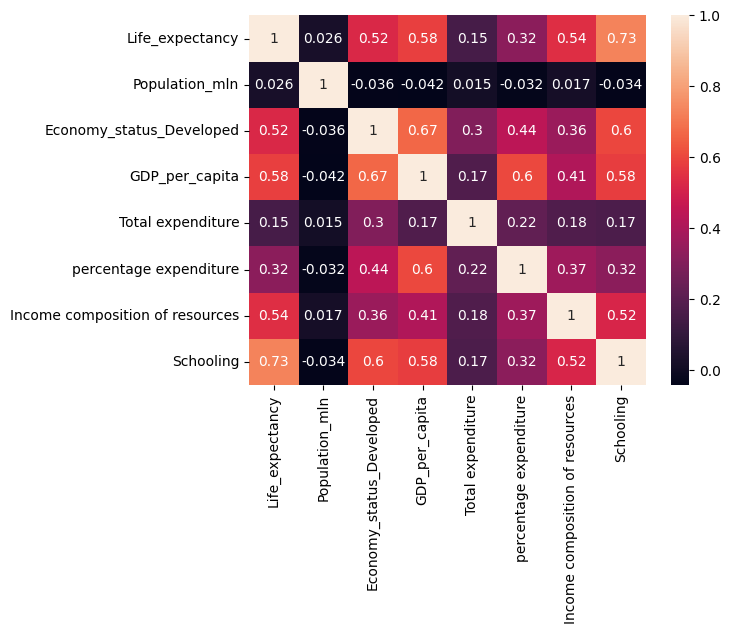

In [93]:
sns.heatmap(region_df.corr(), annot=True)

## Age - Health

<Axes: >

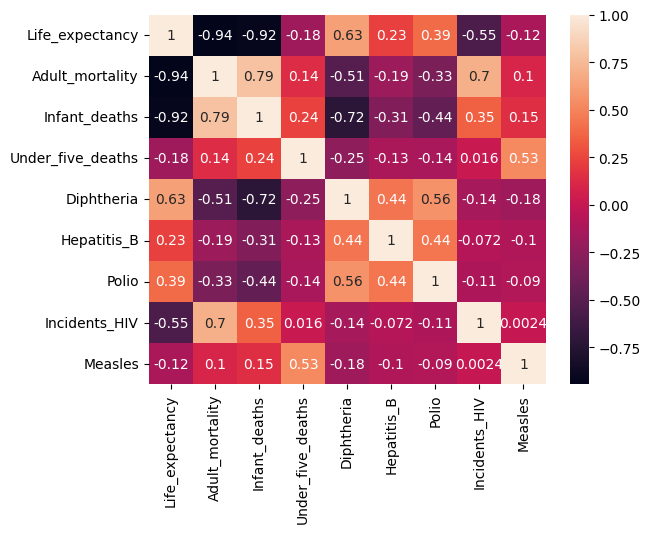

In [94]:
age_health_df = pd.DataFrame(df, columns=['Life_expectancy', 'Adult_mortality', 'Infant_deaths', 'Under_five_deaths', 'Diphtheria', 'Hepatitis_B', 'Polio', 'Incidents_HIV', 'Measles'])
sns.heatmap(age_health_df.corr(), annot=True)

Diphtheria 접종률과 유아 사망률의 연관성이 높으며, 그러한 유아사망률과의 관계가 기대수명과도 이어지는 것을 확인할 수 있다. Hepatitis_B 접종률과 Polio 접종률은 나이별 사망률, 기대수명과 크게 연관이 없으므로 전처리 과정에서 속성을 제거할 것이다. 1세 아동의 디프테리아 파상풍 독소 및 백일해 예방접종률, 15~49세 인구 1,000명당 HIV 발병률은 기대수명과 조금의 연관성이 있으며, 특정 나이에 따라 큰 연관성을 보이기도 한다. Measles는 연관이 없는 것처럼 보이나, 예외로 5살 이하의 어린이들에게는 조금은 유의미한 연관성을 보인다.
전처리 시에 살리는 데이터: Diphtheria, Incident_HIV

## Age - Region


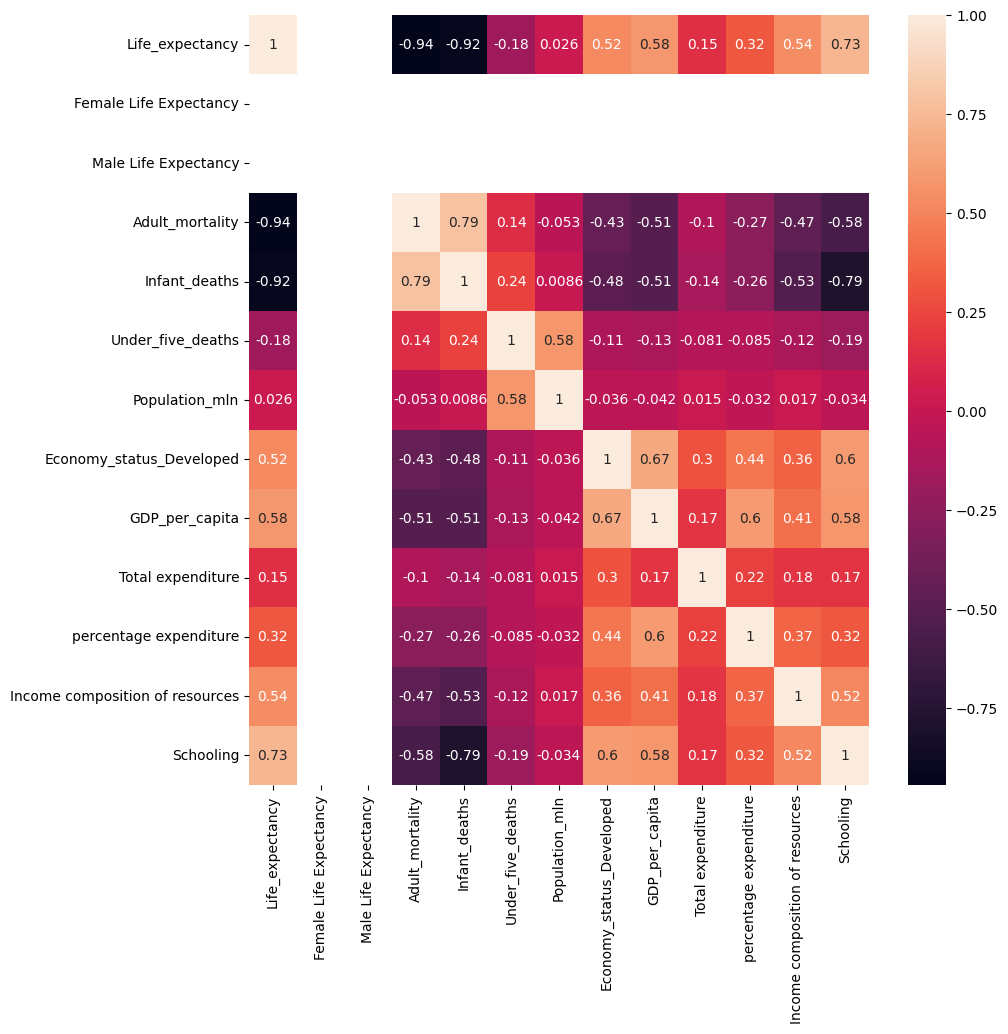

In [95]:
age_region_df = pd.DataFrame(df, columns=['Life_expectancy', 'Female Life Expectancy', 'Male Life Expectancy','Adult_mortality', 'Infant_deaths', 'Under_five_deaths','Population_mln', 'Economy_status_Developed', 'GDP_per_capita', 'Total expenditure', 'percentage expenditure','Income composition of resources', 'Schooling'])
plt.figure(figsize=(10, 10))
sns.heatmap(age_region_df.corr(), annot=True)
plt.show()

전처리 시에 살리는 데이터: Economy_status_Developed, GDP_per_capita, Income composition of resources, Schooling

## Health - Region

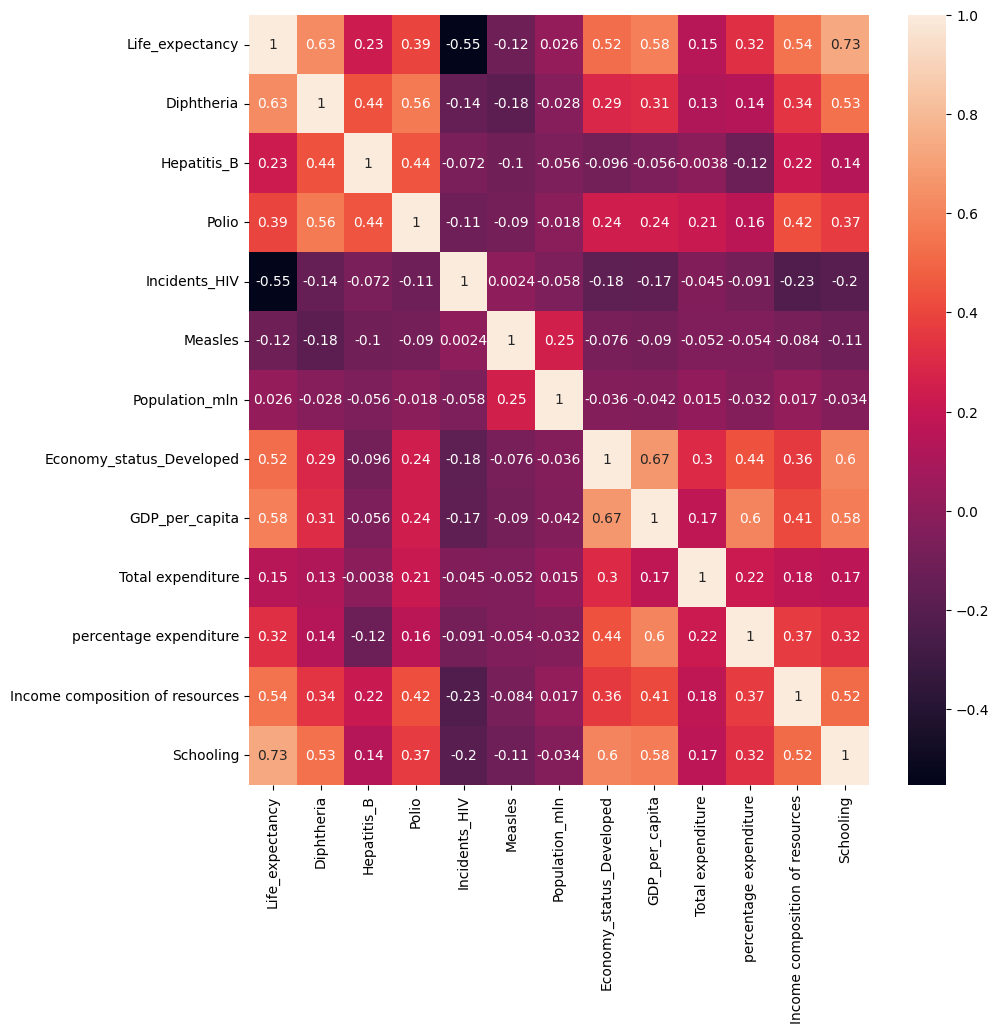

In [96]:
health_region_df = pd.DataFrame(df, columns=['Life_expectancy', 'Diphtheria', 'Hepatitis_B', 'Polio', 'Incidents_HIV', 'Measles','Population_mln', 'Economy_status_Developed', 'GDP_per_capita', 'Total expenditure', 'percentage expenditure','Income composition of resources', 'Schooling'])
plt.figure(figsize=(10, 10))
sns.heatmap(health_region_df.corr(), annot=True)
plt.show()

## 3. 데이터 전처리

In [97]:
columns=['Adult_mortality', 'Infant_deaths', 'Under_five_deaths', 'Alcohol_consumption', 'BMI', 'Thinness_five_nine_years', 'Thinness_ten_nineteen_years', 'Diphtheria', 'Hepatitis_B', 'Polio', 'Incidents_HIV', 'Measles','Population_mln', 'Economy_status_Developed', 'GDP_per_capita', 'Total expenditure', 'percentage expenditure','Income composition of resources', 'Schooling']
features_df = pd.DataFrame(df, columns=columns)
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2842 entries, 0 to 2847
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Adult_mortality                  2842 non-null   float64
 1   Infant_deaths                    2842 non-null   float64
 2   Under_five_deaths                2842 non-null   float64
 3   Alcohol_consumption              2842 non-null   float64
 4   BMI                              2842 non-null   float64
 5   Thinness_five_nine_years         2842 non-null   float64
 6   Thinness_ten_nineteen_years      2842 non-null   float64
 7   Diphtheria                       2842 non-null   int64  
 8   Hepatitis_B                      2842 non-null   int64  
 9   Polio                            2842 non-null   float64
 10  Incidents_HIV                    2842 non-null   float64
 11  Measles                          2842 non-null   int64  
 12  Population_mln      

In [98]:
life_exp = df['Life_expectancy']
life_exp.info()

<class 'pandas.core.series.Series'>
Int64Index: 2842 entries, 0 to 2847
Series name: Life_expectancy
Non-Null Count  Dtype  
--------------  -----  
2842 non-null   float64
dtypes: float64(1)
memory usage: 44.4 KB


In [99]:
features_df.isna().sum()

Adult_mortality                    0
Infant_deaths                      0
Under_five_deaths                  0
Alcohol_consumption                0
BMI                                0
Thinness_five_nine_years           0
Thinness_ten_nineteen_years        0
Diphtheria                         0
Hepatitis_B                        0
Polio                              0
Incidents_HIV                      0
Measles                            0
Population_mln                     0
Economy_status_Developed           0
GDP_per_capita                     0
Total expenditure                  0
percentage expenditure             0
Income composition of resources    0
Schooling                          0
dtype: int64

In [100]:
# 아래에서 제거할 특성들의 경우 앞에 '#'를 적으시면 됩니다. (예시: # features_df['Thinness_five_nine_years'].values,)
scaled_features = StandardScaler().fit_transform([
    features_df['Adult_mortality'].values,
    features_df['Infant_deaths'].values,
    features_df['Under_five_deaths'].values,
    features_df['Alcohol_consumption'].values,
    features_df['BMI'].values,
    features_df['Thinness_five_nine_years'].values,
    features_df['Thinness_ten_nineteen_years'].values,
    features_df['Diphtheria'].values,
    features_df['Hepatitis_B'].values,
    features_df['Polio'].values,
    features_df['Incidents_HIV'].values,
    features_df['Measles'].values,
    features_df['Population_mln'].values,
    features_df['GDP_per_capita'].values,
    features_df['Total expenditure'].values,
    features_df['percentage expenditure'].values,
    features_df['Income composition of resources'].values,
    features_df['Schooling'].values,

])

scaled_features.shape

(18, 2842)

In [101]:
scaled_features_df = pd.DataFrame(scaled_features.T, columns=['Adult_mortality', 'Infant_deaths', 'Under_five_deaths', 'Alcohol_consumption', 'BMI', 'Thinness_five_nine_years', 'Thinness_ten_nineteen_years', 'Diphtheria', 'Hepatitis_B', 'Polio', 'Incidents_HIV', 'Measles','Population_mln', 'GDP_per_capita', 'Total expenditure', 'percentage expenditure','Income composition of resources', 'Schooling'])
scaled_features_df.head()

,Adult_mortality,Infant_deaths,Under_five_deaths,Alcohol_consumption,BMI,Thinness_five_nine_years,Thinness_ten_nineteen_years,Diphtheria,Hepatitis_B,Polio,Incidents_HIV,Measles,Population_mln,GDP_per_capita,Total expenditure,percentage expenditure,Income composition of resources,Schooling
0,-0.066409,-0.214592,-0.193406,-0.275444,-0.267252,-0.273776,-0.273910,-0.259316,-0.233759,-0.259316,-0.275444,4.117620,-0.261482,-0.175920,-0.269942,-0.268446,-0.275230,-0.273977
1,-0.115268,-0.223921,-0.206843,-0.267931,-0.261631,-0.266739,-0.266890,-0.251415,-0.236391,-0.250413,-0.267931,4.120093,-0.257119,-0.186310,-0.264035,-0.262645,-0.267771,-0.266839
2,0.182179,-0.197084,-0.131916,-0.348515,-0.325467,-0.344644,-0.313214,-0.284626,-0.234906,-0.284626,-0.348515,4.065829,-0.308420,0.219672,-0.334771,-0.318564,-0.347945,-0.344467
3,0.975449,-0.110860,0.093079,-0.539911,-0.470478,-0.436748,-0.437786,-0.327254,-0.202711,-0.327254,-0.539911,3.601042,-0.417132,1.182831,-0.494245,-0.482471,-0.538079,-0.527561
4,1.544320,-0.025902,0.280202,-0.637957,-0.532504,-0.487354,-0.488884,-0.255480,-0.125386,-0.599847,-0.637957,2.928002,-0.448861,1.833680,-0.570844,-0.521055,-0.635194,-0.618979


In [102]:
# EDA 단계 기준으로 특성 제거
transformed_df = scaled_features_df.drop(['Infant_deaths', 'Under_five_deaths', 'Thinness_five_nine_years', 'Thinness_ten_nineteen_years', 'Hepatitis_B', 'Measles', 'Population_mln', 'Total expenditure', 'percentage expenditure'], axis=1)
transformed_df

,Adult_mortality,Alcohol_consumption,BMI,Diphtheria,Polio,Incidents_HIV,GDP_per_capita,Income composition of resources,Schooling
0,-0.066409,-0.275444,-0.267252,-0.259316,-0.259316,-0.275444,-0.175920,-0.275230,-0.273977
1,-0.115268,-0.267931,-0.261631,-0.251415,-0.250413,-0.267931,-0.186310,-0.267771,-0.266839
2,0.182179,-0.348515,-0.325467,-0.284626,-0.284626,-0.348515,0.219672,-0.347945,-0.344467
3,0.975449,-0.539911,-0.470478,-0.327254,-0.327254,-0.539911,1.182831,-0.538079,-0.527561
4,1.544320,-0.637957,-0.532504,-0.255480,-0.599847,-0.637957,1.833680,-0.635194,-0.618979
...,...,...,...,...,...,...,...,...,...
2837,1.171471,-0.411065,-0.322107,-0.106130,-0.106130,-0.403740,3.850594,-0.422901,-0.399462
2838,0.884229,-0.388071,-0.389982,-0.111873,-0.111873,-0.384432,3.942993,-0.398583,-0.376031
2839,0.843480,-0.368991,-0.369928,-0.094104,-0.094104,-0.366995,3.958574,-0.379945,-0.357226
2840,0.785473,-0.368183,-0.286476,-0.106347,-0.103330,-0.367972,3.975983,-0.379414,-0.356175


In [103]:
transformed_df = transformed_df.join(features_df['Economy_status_Developed'].reset_index().drop(['index'], axis=1))

In [104]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842 entries, 0 to 2841
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Adult_mortality                  2842 non-null   float64
 1   Alcohol_consumption              2842 non-null   float64
 2   BMI                              2842 non-null   float64
 3   Diphtheria                       2842 non-null   float64
 4   Polio                            2842 non-null   float64
 5   Incidents_HIV                    2842 non-null   float64
 6   GDP_per_capita                   2842 non-null   float64
 7   Income composition of resources  2842 non-null   float64
 8   Schooling                        2842 non-null   float64
 9   Economy_status_Developed         2842 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 222.2 KB


In [105]:
countries_df = pd.get_dummies(df['Country'].reset_index().drop(['index'], axis=1))
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842 entries, 0 to 2841
Columns: 178 entries, Country_Afghanistan to Country_Zimbabwe
dtypes: uint8(178)
memory usage: 494.1 KB


In [106]:
transformed_df = transformed_df.join(countries_df)
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842 entries, 0 to 2841
Columns: 188 entries, Adult_mortality to Country_Zimbabwe
dtypes: float64(9), int64(1), uint8(178)
memory usage: 716.2 KB


In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_df, life_exp, test_size=0.3, random_state=42)

In [108]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(features_df, life_exp, test_size=0.3, random_state=42)

In [109]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)

print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.9713888310353681 0.9599132950966511


In [110]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train), rf.score(X_test, y_test))
print(rf.feature_importances_)

0.9934054160102503 0.9497944694256429
[6.37793192e-01 5.81060872e-03 1.66357093e-02 5.11643874e-02
 2.75412270e-02 1.02880284e-02 1.64606530e-01 4.34749333e-03
 4.55673935e-03 2.23699541e-02 4.69223510e-04 7.48097989e-06
 1.87332180e-05 1.04758258e-03 1.68427942e-05 1.38584060e-05
 2.65953688e-05 2.63739893e-05 7.02693762e-06 1.23744448e-04
 2.22769571e-04 1.44965087e-05 6.17394673e-04 3.19915099e-04
 3.02564550e-05 1.26365255e-05 8.07539624e-06 9.10524837e-05
 6.82845541e-05 2.92157329e-05 3.55866324e-05 3.05479920e-04
 1.14500636e-05 4.01627490e-05 3.33540717e-05 9.53114304e-05
 1.83016167e-05 1.87103032e-05 5.50048978e-05 5.60476491e-04
 9.94820892e-06 9.45223876e-04 1.96837358e-04 2.72027465e-04
 2.16819589e-05 4.78492757e-04 1.14376922e-04 5.61362858e-05
 1.15494797e-04 5.72992252e-04 2.85928202e-04 3.57165191e-04
 4.40125084e-05 1.38861011e-06 1.71830597e-04 8.89932020e-05
 1.43128106e-05 7.89623724e-05 2.91659659e-05 9.67524890e-05
 9.60640634e-03 1.09001762e-04 1.26466494e-04 8

In [111]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Assuming X_train and y_train are already defined
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Get indices of top 5 features
top_5_indices = np.argsort(importances)[-5:]

# Get names of top 5 features
top_5_features = X_train.columns[top_5_indices]

# Print top 5 features and their importances
for feature, importance in zip(top_5_features, importances[top_5_indices]):
    print(f"{feature}: {importance}")


Economy_status_Developed: 0.02236995405344842
Polio: 0.027541227046907223
Diphtheria: 0.05116438742031572
GDP_per_capita: 0.16460653006595055
Adult_mortality: 0.6377931921795933


In [112]:
from sklearn.linear_model import Ridge

alpha_list = [0.00001, 0.0001,0.001, 0.01, 0.1, 1, 10, 100]
train_score = []
test_score = []

for alpha in range(len(alpha_list)):
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train, y_train)

  train_score.append(ridge.score(X_train, y_train))
  test_score.append(ridge.score(X_test, y_test))

ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)
print(ridge.score(X_train, y_train), ridge.score(X_test, y_test))

0.9710670758846138 0.9593504322096037


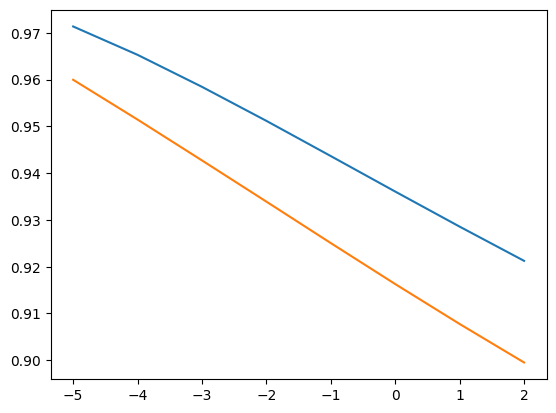

In [113]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

In [114]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate, GridSearchCV

train_score = []
test_score = []
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBRegressor(tree_method='hist', random_state=42)
gs = GridSearchCV(xgb, params)

gs.fit(X_train1, y_train1)
print(gs.score(X_train1, y_train1), gs.score(X_test1, y_test1))

scores = cross_validate(xgb, X_train1, y_train1, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9988298823956359 0.9949667123622773
0.9999675683532148 0.9947512343934752


In [115]:
gs.best_params_

{'colsample_bytree': 1.0,
 'gamma': 0.5,
 'max_depth': 5,
 'min_child_weight': 5,
 'subsample': 0.8}

In [116]:
xgb1 = XGBRegressor(tree_methods='hist', colsample_bytree = 1.0, gamma = 0.5, max_depth=5)
param = {}

In [117]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(tree_methods='hist', colsample_bytree = 1.0, gamma = 0.5, max_depth=5).fit(X_train, y_train)

# 파일명
filename = 'xgb_model.model'

# 모델 저장
xgb_model.save_model(filename)

# 모델 불러오기
new_xgb_model = xgb.XGBRegressor() # 모델 초기화
new_xgb_model.load_model(filename) # 모델 불러오기

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:58:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "tree_methods" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:58:24] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
